In [2]:
from google.colab import files
uploaded = files.upload()  # Choose the file: House Price India.csv


Saving House Price India.csv.zip to House Price India.csv (1).zip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [5]:
import zipfile
import io

# Unzip the uploaded file
zip_file = zipfile.ZipFile(io.BytesIO(uploaded['House Price India.csv (1).zip']), 'r')
zip_file.extractall()

# Get the name of the extracted file (assuming it's a CSV)
extracted_filename = zip_file.namelist()[0]
print(f"Extracted file: {extracted_filename}")

Extracted file: Housing.csv


In [6]:
# Load the extracted CSV
df = pd.read_csv(extracted_filename)

# Check basic info
print("Shape of dataset:", df.shape)
display(df.head())

Shape of dataset: (545, 13)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [7]:
# Find columns with missing values
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print("Missing values:\n", missing)


Missing values:
 Series([], dtype: int64)


In [8]:
# Fill numeric columns with median
df.fillna(df.median(numeric_only=True), inplace=True)

# Fill categorical columns with mode
for col in df.select_dtypes(include='object'):
    df[col].fillna(df[col].mode()[0], inplace=True)


In [9]:
# Convert categorical features to numeric using one-hot encoding
df_encoded = pd.get_dummies(df)

print("Shape after encoding:", df_encoded.shape)


Shape after encoding: (545, 21)


In [10]:
# Check again for missing values
print("Missing values after cleaning:", df_encoded.isnull().sum().sum())


Missing values after cleaning: 0


In [12]:
# Split features (X) and target (y)
X = df_encoded.drop("price", axis=1)
y = df_encoded["price"]

In [13]:
from sklearn.model_selection import train_test_split

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check sizes
print("Training set:", X_train.shape)
print("Test set:", X_test.shape)


Training set: (436, 20)
Test set: (109, 20)


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


In [15]:
# Initialize the model
lr_model = LinearRegression()

# Fit to training data
lr_model.fit(X_train, y_train)


LinearRegression()

In [16]:
# Predict on test data
y_pred = lr_model.predict(X_test)


In [17]:
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# R-squared score
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)


Mean Squared Error (MSE): 1754318687330.6614
Root Mean Squared Error (RMSE): 1324506.9600914377
R² Score: 0.6529242642153188


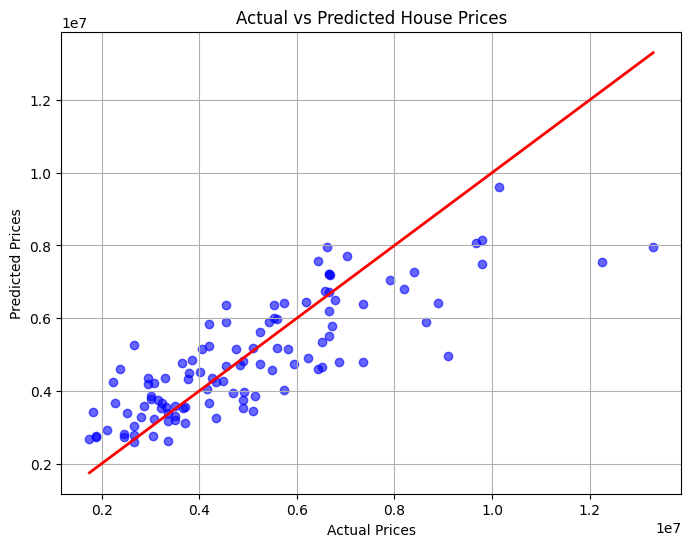

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()


In [19]:
# Coefficients
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coeff_df.head(10))  # Top 10 most impactful features


                         Feature   Coefficient
2                      bathrooms  1.094445e+06
3                        stories  4.074766e+05
14           airconditioning_yes  3.957134e+05
13            airconditioning_no -3.957134e+05
12           hotwaterheating_yes  3.423249e+05
11            hotwaterheating_no -3.423249e+05
15                   prefarea_no -3.149453e+05
16                  prefarea_yes  3.149453e+05
19  furnishingstatus_unfurnished -2.334694e+05
4                        parking  2.248419e+05


In [20]:
from sklearn.model_selection import cross_val_score

# 5-fold Cross Validation RMSE
cv_scores = cross_val_score(lr_model, X, y, cv=5, scoring='neg_root_mean_squared_error')
print("Cross-validated RMSE scores:", -cv_scores)
print("Average RMSE:", -cv_scores.mean())


Cross-validated RMSE scores: [2618934.1641314   975775.55205882  934727.80234401  932192.51987419
 1024003.07902875]
Average RMSE: 1297126.6234874364


In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


In [22]:
# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error
rmse = np.sqrt(mse)

# R² Score
r2 = r2_score(y_test, y_pred)

# Print all metrics
print("Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


Model Evaluation Metrics:
Mean Absolute Error (MAE): 970043.40
Mean Squared Error (MSE): 1754318687330.66
Root Mean Squared Error (RMSE): 1324506.96
R² Score: 0.6529


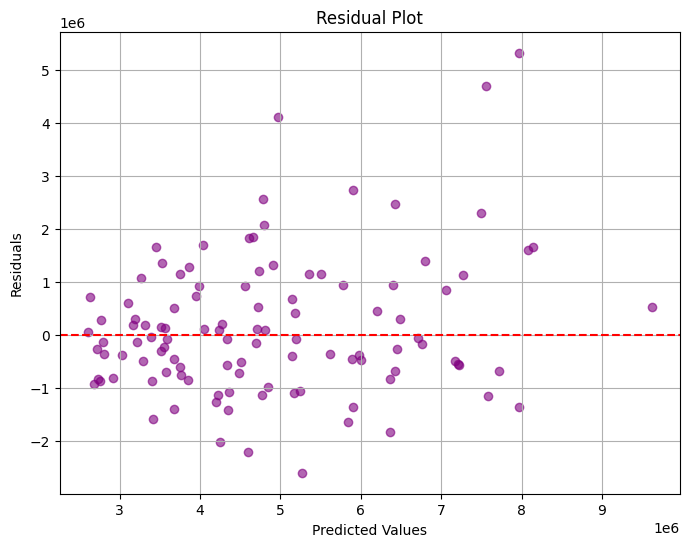

In [23]:
import matplotlib.pyplot as plt

# Residuals
residuals = y_test - y_pred

plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, alpha=0.6, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True)
plt.show()


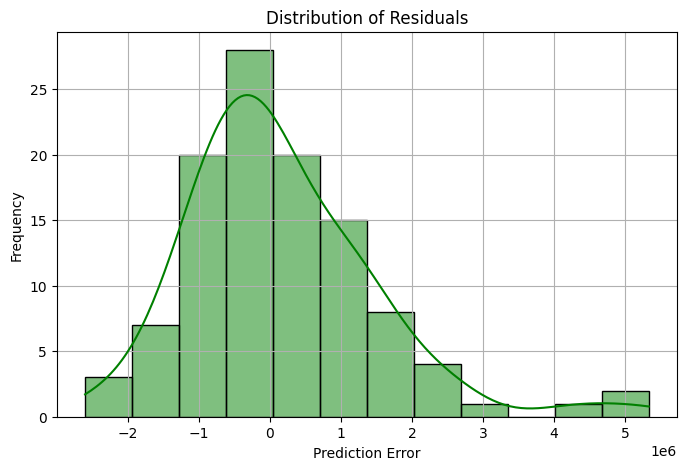

In [24]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True, color="green")
plt.title("Distribution of Residuals")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [25]:
eval_df = pd.DataFrame({
    "Metric": ["MAE", "MSE", "RMSE", "R² Score"],
    "Value": [mae, mse, rmse, r2]
})

print("\nEvaluation Summary:")
print(eval_df)



Evaluation Summary:
     Metric         Value
0       MAE  9.700434e+05
1       MSE  1.754319e+12
2      RMSE  1.324507e+06
3  R² Score  6.529243e-01


In [26]:
# Create a DataFrame to view feature importance
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lr_model.coef_,
    "Abs_Coefficient": np.abs(lr_model.coef_)
}).sort_values(by="Abs_Coefficient", ascending=False)

# View top 10 most important features
print(coeff_df.head(10))


                         Feature   Coefficient  Abs_Coefficient
2                      bathrooms  1.094445e+06     1.094445e+06
3                        stories  4.074766e+05     4.074766e+05
14           airconditioning_yes  3.957134e+05     3.957134e+05
13            airconditioning_no -3.957134e+05     3.957134e+05
12           hotwaterheating_yes  3.423249e+05     3.423249e+05
11            hotwaterheating_no -3.423249e+05     3.423249e+05
15                   prefarea_no -3.149453e+05     3.149453e+05
16                  prefarea_yes  3.149453e+05     3.149453e+05
19  furnishingstatus_unfurnished -2.334694e+05     2.334694e+05
4                        parking  2.248419e+05     2.248419e+05


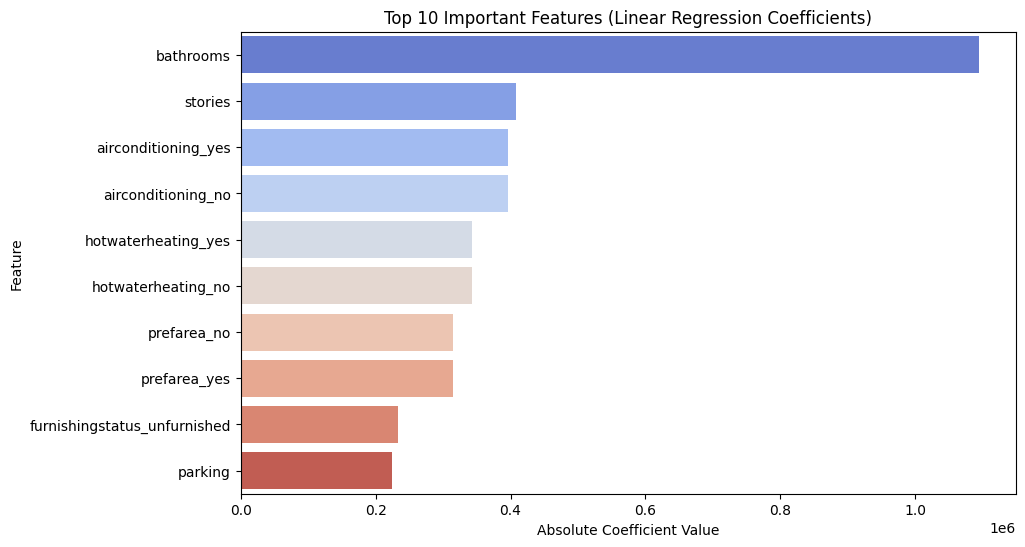

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot top 10 important features
plt.figure(figsize=(10,6))
sns.barplot(x="Abs_Coefficient", y="Feature", data=coeff_df.head(10), palette="coolwarm")
plt.title("Top 10 Important Features (Linear Regression Coefficients)")
plt.xlabel("Absolute Coefficient Value")
plt.ylabel("Feature")
plt.show()


In [28]:
# Check numeric columns
df.select_dtypes(include=np.number).columns


Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

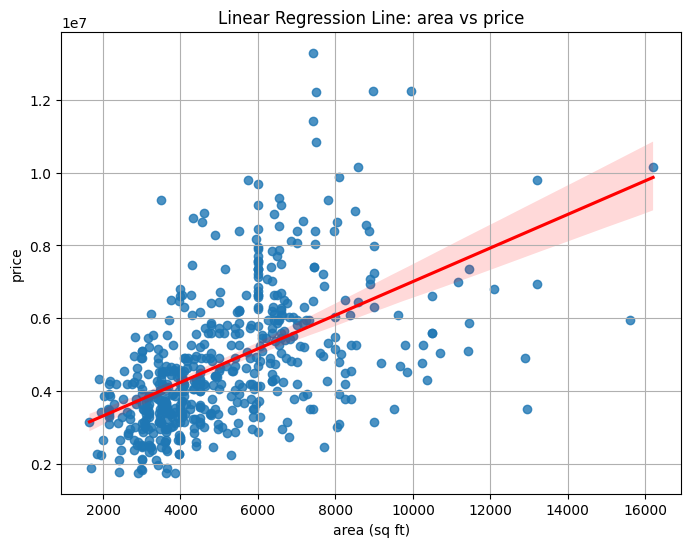

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot regression line using seaborn
plt.figure(figsize=(8,6))
sns.regplot(x=df["area"], y=df["price"], line_kws={"color": "red"})
plt.title("Linear Regression Line: area vs price")
plt.xlabel("area (sq ft)")
plt.ylabel("price")
plt.grid(True)
plt.show()


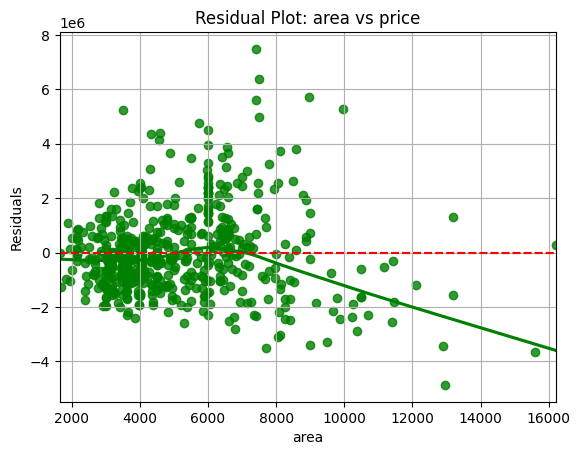

In [32]:
# Plot with residuals
sns.residplot(x=df["area"], y=df["price"], lowess=True, color="green")
plt.title("Residual Plot: area vs price")
plt.xlabel("area")
plt.ylabel("Residuals")
plt.axhline(0, color='red', linestyle='--')
plt.grid(True)
plt.show()


In [34]:
# Create a DataFrame of feature and coefficients
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lr_model.coef_
})

# Interpret the coefficient of Area
area_coef = coeff_df[coeff_df["Feature"] == "area"]["Coefficient"].values[0]
print(f"area Coefficient: {area_coef:.2f}")


area Coefficient: 235.97


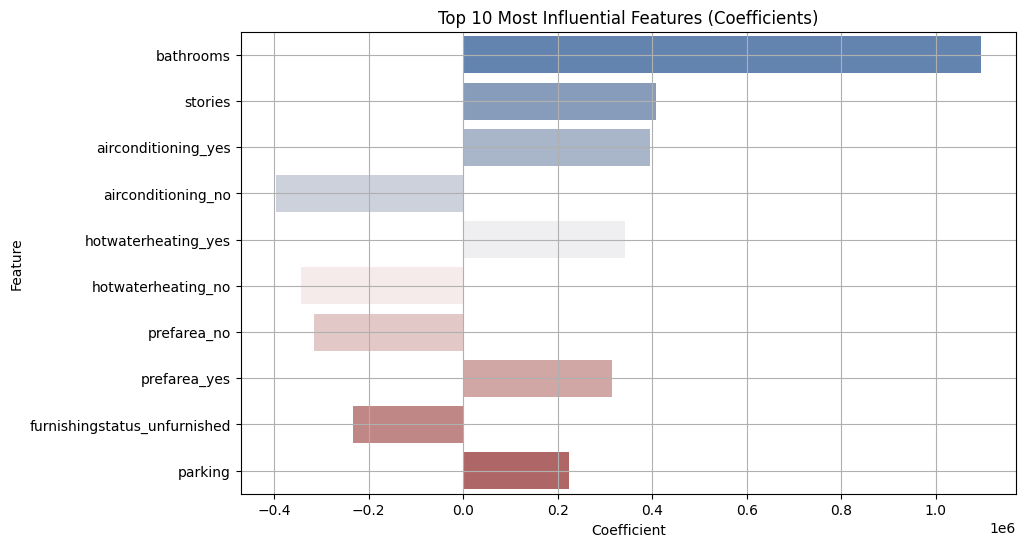

In [35]:
# Top 10 influential features
top_features = coeff_df.reindex(coeff_df.Coefficient.abs().sort_values(ascending=False).index).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x="Coefficient", y="Feature", data=top_features, palette="vlag")
plt.title("Top 10 Most Influential Features (Coefficients)")
plt.grid(True)
plt.show()


In [36]:
import joblib

# Save model to a file
joblib.dump(lr_model, "house_price_lr_model.pkl")

# To load it later:
# model = joblib.load("house_price_lr_model.pkl")


['house_price_lr_model.pkl']

In [37]:
from google.colab import files
files.download("house_price_lr_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [38]:
# Add predictions to the test set for review
pred_df = pd.DataFrame({
    "Actual Price": y_test,
    "Predicted Price": y_pred
})

# Save to CSV
pred_df.to_csv("price_predictions.csv", index=False)

# Download if needed
files.download("price_predictions.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [39]:
print("🔍 Project Summary Report")
print("=========================")
print("✅ Model: Linear Regression")
print(f"✅ Features used: {X.shape[1]}")
print(f"✅ Training samples: {X_train.shape[0]}")
print(f"✅ Testing samples: {X_test.shape[0]}")
print(f"✅ Final Evaluation Metrics:")
print(f"    • MAE  = {mae:.2f}")
print(f"    • MSE  = {mse:.2f}")
print(f"    • RMSE = {rmse:.2f}")
print(f"    • R²   = {r2:.4f}")
print("\n📌 Top Influential Features (based on coefficients):")
print(coeff_df.reindex(coeff_df.Coefficient.abs().sort_values(ascending=False).index).head(5))


🔍 Project Summary Report
✅ Model: Linear Regression
✅ Features used: 20
✅ Training samples: 436
✅ Testing samples: 109
✅ Final Evaluation Metrics:
    • MAE  = 970043.40
    • MSE  = 1754318687330.66
    • RMSE = 1324506.96
    • R²   = 0.6529

📌 Top Influential Features (based on coefficients):
                Feature   Coefficient
2             bathrooms  1.094445e+06
3               stories  4.074766e+05
14  airconditioning_yes  3.957134e+05
13   airconditioning_no -3.957134e+05
12  hotwaterheating_yes  3.423249e+05
